# Project: Investigate a Dataset - [No-show appointments]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

This dataset shows the probability of absence for sample of patients who made a medical appointments in brazil.

#### label of columns:
1-PatientId (identification for patient)

2-AppointmentID (identification for appointment)

3-Gender (male of female)

4-ScheduledDay (day of reservation)

5-AppointmentDay (day of examination)

6-Age (in years)

7-Neighbourhood (patient location)

8-Scholarship (yes or no for governmental aid)

9-Hipertension (yes or no for blood pressure issues)

10-Diabetes (yes or no for blood sugar issues)

11-Alcoholism (yes or no for drinking alcohol)

12-Handcap (yes or no for any disabilities)

13-SMS_received (yes or no if sms was sent)

14-No-show (yes for absence and no for attending the appointment)

### Question(s) for Analysis

1-what is percentage of patients missing the appointment?

2-is a certain gender associated with appointment attending?

3-do patients with hancap more likely to absent?

4-does recieving sms increase probability of attendance for older patients?

5-does location has an impact on absence or attending??

In [69]:
# importing libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

In [2]:
# Upgrade pandas to use dataframe.explode() function. 
# !pip install --upgrade pandas==0.25.0

<a id='wrangling'></a>
## Data Wrangling

> **Gathering Data**: In this step we are going to load our data and make it ready for the next stage of wrangling(Assesing).

In [70]:
# loading and dispalying data
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


> **Assesing Data**: In this step we are going to asses and inspect our data and list issues need to be cleaned.

In [71]:
# test for presence of null values
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [72]:
# test for presence of duplicated rows
df.duplicated().sum()

0

In [73]:
# inspecting if there is wrong data type
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [74]:
# observing unique values for each column to detect odd ones
df['Age'].unique()

array([ 62,  56,   8,  76,  23,  39,  21,  19,  30,  29,  22,  28,  54,
        15,  50,  40,  46,   4,  13,  65,  45,  51,  32,  12,  61,  38,
        79,  18,  63,  64,  85,  59,  55,  71,  49,  78,  31,  58,  27,
         6,   2,  11,   7,   0,   3,   1,  69,  68,  60,  67,  36,  10,
        35,  20,  26,  34,  33,  16,  42,   5,  47,  17,  41,  44,  37,
        24,  66,  77,  81,  70,  53,  75,  73,  52,  74,  43,  89,  57,
        14,   9,  48,  83,  72,  25,  80,  87,  88,  84,  82,  90,  94,
        86,  91,  98,  92,  96,  93,  95,  97, 102, 115, 100,  99,  -1])

In [75]:
# checking for occurances of obsereved odd values 
df['Age'].value_counts()

 0      3539
 1      2273
 52     1746
 49     1652
 53     1651
 56     1635
 38     1629
 59     1624
 2      1618
 50     1613
 57     1603
 36     1580
 51     1567
 19     1545
 39     1536
 37     1533
 54     1530
 34     1526
 33     1524
 30     1521
 6      1521
 3      1513
 17     1509
 32     1505
 5      1489
 44     1487
 18     1487
 58     1469
 46     1460
 45     1453
        ... 
 74      602
 76      571
 75      544
 78      541
 77      527
 80      511
 81      434
 82      392
 79      390
 84      311
 83      280
 85      275
 86      260
 87      184
 89      173
 88      126
 90      109
 92       86
 91       66
 93       53
 94       33
 95       24
 96       17
 97       11
 98        6
 115       5
 100       4
 102       2
 99        1
-1         1
Name: Age, Length: 104, dtype: int64

In [76]:
# observing unique values for each column to detect odd ones
df['Handcap'].unique()

array([0, 1, 2, 3, 4])

In [77]:
# checking for occurances of obsereved odd values
df['Handcap'].value_counts()

0    108286
1      2042
2       183
3        13
4         3
Name: Handcap, dtype: int64

In [78]:
# showing descriptive statistics for quantitative columns
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


> **list of issues to be cleaned**:

1- useless columns to be dropped as they will not provide us with valuable information (PatientId, AppointmentID) 

2- age (0) maybe for new born babies with 3539 occurances but (-1) with only one occurance needs to be cleaned

3-handcap column has more than boolean values (2,3,4 maybe representing degree of disability)

4-fixing columns labels format


### Data Cleaning
in this step we are going to clean issues that listed in the assesing stage.
 

### fixing issue(1) 
geeting rid of columns with no valuable information for analysis

In [79]:
# drop useless columns
df.drop(['PatientId', 'AppointmentID'], axis=1, inplace=True)

In [80]:
# check for dropping cloumns
df.head(1)

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


### fixing issue(2) 
remove row with age = -1

In [81]:
# getting index for row with age = -1
i = df[df['Age'] == -1].index
i

Int64Index([99832], dtype='int64')

In [82]:
# display that row to make sure 
df.iloc[[99832]]

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


In [83]:
# drop row with age = -1
df.drop(i, inplace=True)

In [84]:
# check for dropping the row
df['Age'].min()

0

### fixing issue(3) 
handcap column has more than boolean values (2,3,4, maybe representing degree of disability) so they are gonna be set as true (1) which gives the same meaning plus consistency

In [85]:
# replacing each value of 2,3,4 in handcap column with boolean value (1)
df['Handcap'].replace(to_replace=(2,3,4), value=1, inplace=True)
df['Handcap'].unique()

array([0, 1])

In [86]:
#check for correct replacing 
df['Handcap'].value_counts()

0    108285
1      2241
Name: Handcap, dtype: int64

### fixing issue(4) 
columns labels uniforming

In [87]:
# rename columns labels
df.rename(columns = lambda x: x.lower().replace('-','_'), inplace=True)
df.head(1)

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


<a id='eda'></a>
## Exploratory Data Analysis

in this stage we are going to explore our data using visuals and statistics to show trends and answer questions










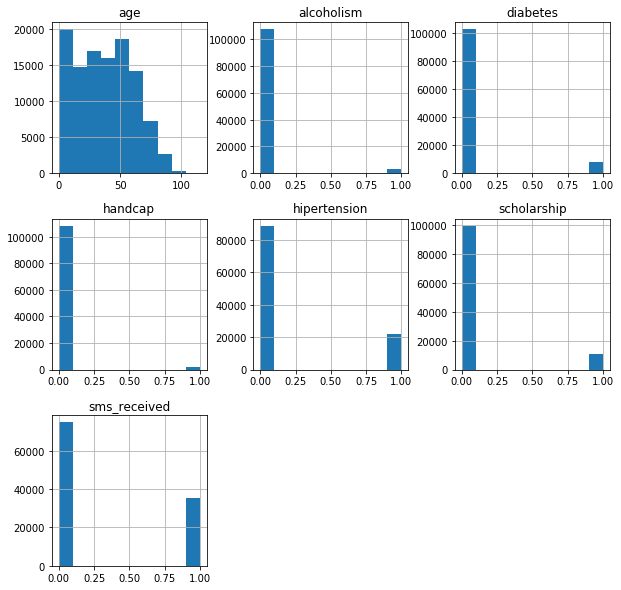

In [88]:
# expoloring data with visualization
df.hist(figsize=(10,10));

### Research Question 1 (what is percentage of patients missing the appointment?)

In [89]:
# calculating counts for each unique group
patients_attending_status = df['no_show'].value_counts()
patients_attending_status

No     88207
Yes    22319
Name: no_show, dtype: int64

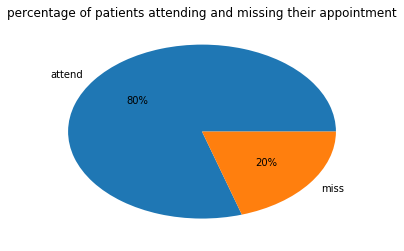

In [90]:
# visualizing percentages with no=attend & yes=miss
plt.pie(patients_attending_status , labels=('attend', 'miss'), autopct='%1.0f%%')
plt.title('percentage of patients attending and missing their appointment');

### conclusion(1): 
patients missing their appointment represent 20% of reservations 

### Research Question 2 (is a certain gender associated with appointment attending?)

first we need to split our data into two dataframes for both attending their appointment or not

In [91]:
# creating two dataframes using mask 
df_attend = df[df['no_show'] == 'No']
df_miss = df[df['no_show'] == 'Yes']

In [92]:
# display data for the new dataframe
df_attend.head(1)

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


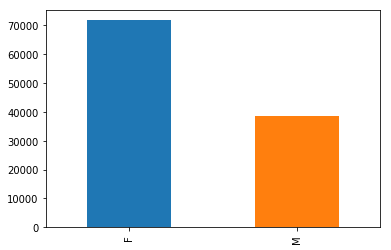

In [93]:
# ratio of males to females 
df['gender'].value_counts().plot(kind='bar');

we need to calculate portion of each gender to make an equal comparison as females are much more than males

#### creating a function to plot a bar chart for portion of a filtered column data over the original one.

In [94]:
def portionbar(filtered_col, total_col, title, xlabel, ylabel, bar_labels):
    """ this function calculates portion for each filtered column values over original column values
    where, filtered_col = column values under certain condition (mask dataframe)
           total_col = original column values (original dataframe)
           title = title of bar chart
           xlabel = label under x axis
           ylabel = label besides y axis
           bar_labels = label of each bar """
   
    # calculating counts for each unique value in the filtered column
    valcount_filcol = filtered_col.value_counts()
    # calculating counts for each unique value in the original column
    valcount_totcol = total_col.value_counts()
    # calculating portion values
    filcol_portion = valcount_filcol / valcount_totcol
    # plotting a bar chart using matplotlib for each portion 
    plt.bar(filcol_portion.index, filcol_portion, tick_label = bar_labels)
    plt.title(title) 
    plt.xlabel(xlabel)
    plt.ylabel(ylabel);
    

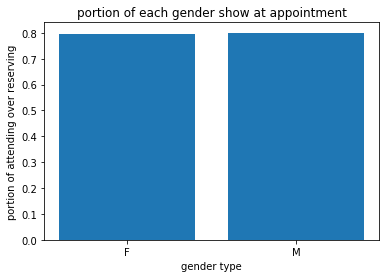

In [95]:
# visualizing portion of each gender attending the appointment
portionbar(df_attend['gender'], df['gender'], 'portion of each gender show at appointment', 'gender type', 
           'portion of attending over reserving', ('F', 'M'))

### conclusion(2): 
it seems that gender type by itself has no direct assosiation with whom attending the appointment

### Research Question 3  (do patients with hancap more likely to absent?)

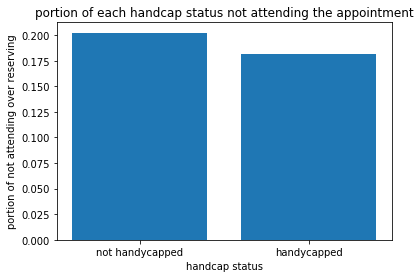

In [96]:
# visualizing portion of each handcap status not attending the appointment
portionbar(df_miss['handcap'], df['handcap'], 'portion of each handcap status not attending the appointment', 'handcap status',
          'portion of not attending over reserving', ('not handycapped','handycapped'))

### conclusion(3): 
it seems that handycapped patients are less likely to miss the appointment than normal patients 

### Research Question 4  (does recieving sms increase probability of attendance for older people?)

In [97]:
# calculating average age based on receiving sms for people who attended the appointment 
avg_age_attend = df_attend.groupby('sms_received')['age'].mean()
avg_age_attend

sms_received
0    37.338767
1    38.889330
Name: age, dtype: float64

In [98]:
# calculatin average age based on receiving sms for people who did not attend the appointment  
avg_age_miss = df_miss.groupby('sms_received')['age'].mean()
avg_age_miss

sms_received
0    34.642920
1    33.900961
Name: age, dtype: float64

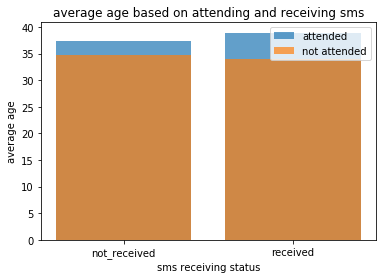

In [99]:
# creating bar chart to describe avg age based on attending and receiving sms
plt.bar(avg_age_attend.index, avg_age_attend, alpha=0.7, tick_label=('not_received', 'received'), label='attended')
plt.bar(avg_age_miss.index, avg_age_miss, alpha=0.7, tick_label=('not_received', 'received'), label='not attended');
plt.title('average age based on attending and receiving sms')
plt.xlabel('sms receiving status')
plt.ylabel('average age')
plt.legend();

### conclusion(4): 
older patients need a reminder sms of the appointment date

### Research Question 5  (does location has an impact on absence or attending?)

In [100]:
# most common location for patients missing their appointment
df_miss['neighbourhood'].mode()[0]

'JARDIM CAMBURI'

In [101]:
# most common location for patients attending their appointment
df_attend['neighbourhood'].mode()[0]

'JARDIM CAMBURI'

### conclusion(5): 
patient's location has no impact on attening status

<a id='conclusions'></a>
## Conclusions


The analysis shows that patients missed their appointment represent 20% of patients reserved for an appointment and those 20% patients are almost with an equal portion between males and females so that, no certain gender type has higher probability of missing the appointment.
It is recomended to send sms reminder for older people.
There is no preferable location for patients who attended or missed the appointment.
Handycapped patients are less likely to miss the appointment than normal patients.

#### Additional research and information:

Distance between neighbourhood and clinic location maybe a useful piece of informaition that affect absence of patients.

#### Data limitation:

Age values of (0) were not assumed as wrong data nor neglected as they have 3539 occurances and treated as correct values for babies under 1 year old.

Handcap data has values of (2, 3, 4) which were assumed as a degree of disability so that, those values were treated as boolean value of (1) which indicates that this patient is handycapped regardless of the original meaning of those values(2, 3, 4).











In [102]:
from subprocess import call
# call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0